# Beta Distribution
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Ali Borzoozadeh

*SID:* 810102410

The objective of this notebook is to estimate the probability of getting tails in a coin flip using a Bayesian approach.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
from scipy.special import gammaln
from typing import List

In [2]:
class BetaDistribution:
    """
    Represents a beta distribution with the given shape parameters.
    """

    def __init__(self, alpha: float, beta: float):
        """
        Args:
            alpha (float): The first shape parameter of the beta distribution.
            beta (float): The second shape parameter of the beta distribution.
        """

        self.alpha = alpha
        self.beta = beta

    def pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the normalized probability density function (PDF) of the beta distribution at the given input value(s).
        Args:
            x (float or np.ndarray): The input value(s) to evaluate the beta distribution PDF at.
        Returns:
            pdf (float or np.ndarray): The normalized probability density function evaluated at the input value(s).
        """
        x = np.clip(x, 1e-10, 1 - 1e-10)
        log_B = gammaln(self.alpha) + gammaln(self.beta) - gammaln(self.alpha + self.beta)
        return np.exp((self.alpha - 1) * np.log(x) + (self.beta - 1) * np.log(1 - x) - log_B)

    def __unnormalized_pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the unnormalized probability density function (PDF) of the beta distribution at the given input value(s).

        Args:
            x (float or np.ndarray): The input value(s) to evaluate the unnormalized beta distribution PDF at.

        Returns:
            pdf (float or np.ndarray): The unnormalized probability density function evaluated at the input value(s).
        """
        return x**(self.alpha - 1) * (1 - x)**(self.beta - 1)

    def __calculate_normalization_constant(self):
        """
        Calculates the normalization constant for the beta distribution.
        This constant is used to ensure that the total probability under the PDF is 1.
        """
        log_B = gammaln(self.alpha) + gammaln(self.beta) - gammaln(self.alpha + self.beta)
        return np.exp(log_B)

The normalization constant will be calculated,
with this formula: $B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$

Due to the overflow problem, we use its logarithm instead of the gamma function.

To reach to the pdf we only should divide the unnormalized pdf to B.

In [3]:
def plot_beta_dist(beta: BetaDistribution):
    """
    Plots the probability density function of the given beta distribution.

    Args:
        beta (BetaDistribution): The beta distribution instance to plot.
    """
    x = np.linspace(0, 1, 1000)
    y = beta.pdf(x)
    
    plt.plot(x, y, label=f'Beta({beta.alpha}, {beta.beta})')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)

Read the `coint_flips.txt` file and plot the posterior distributions after every 50 trials for two prior probabilities:
1. Uniform distribution 
2. $Beta (4, 10)$

In [4]:
def read_coin_flips(file_path):
    with open(file_path, 'r') as file:
        flips = file.read().strip()
    return [1 if flip == 'H' else 0 if flip == 'T' else None for flip in flips if flip in ['H', 'T']]

## Prior: Uniform

**Hint:** use `plt.figure(figsize=(25, 20))` and `plt.subplot(4, 5, ...)`

In [5]:
def plot_posteriors_after_trials(beta: BetaDistribution, flips: List[int]):
    num_plots = (len(flips) // 50) + 1
    num_figures = (num_plots // 20) + 1

    for fig_num in range(num_figures):
        plt.figure(figsize=(25, 20))
        for i in range(20):
            plot_index = fig_num * 20 + i
            if plot_index * 50 > len(flips):
                break
            heads = sum(flips[:plot_index * 50])
            tails = plot_index * 50 - heads

            posterior = BetaDistribution(beta.alpha + heads, beta.beta + tails)

            plt.subplot(4, 5, i + 1)
            plot_beta_dist(posterior)
            plt.title(f'Posterior after {plot_index * 50} trials')

        plt.tight_layout()
        plt.show()

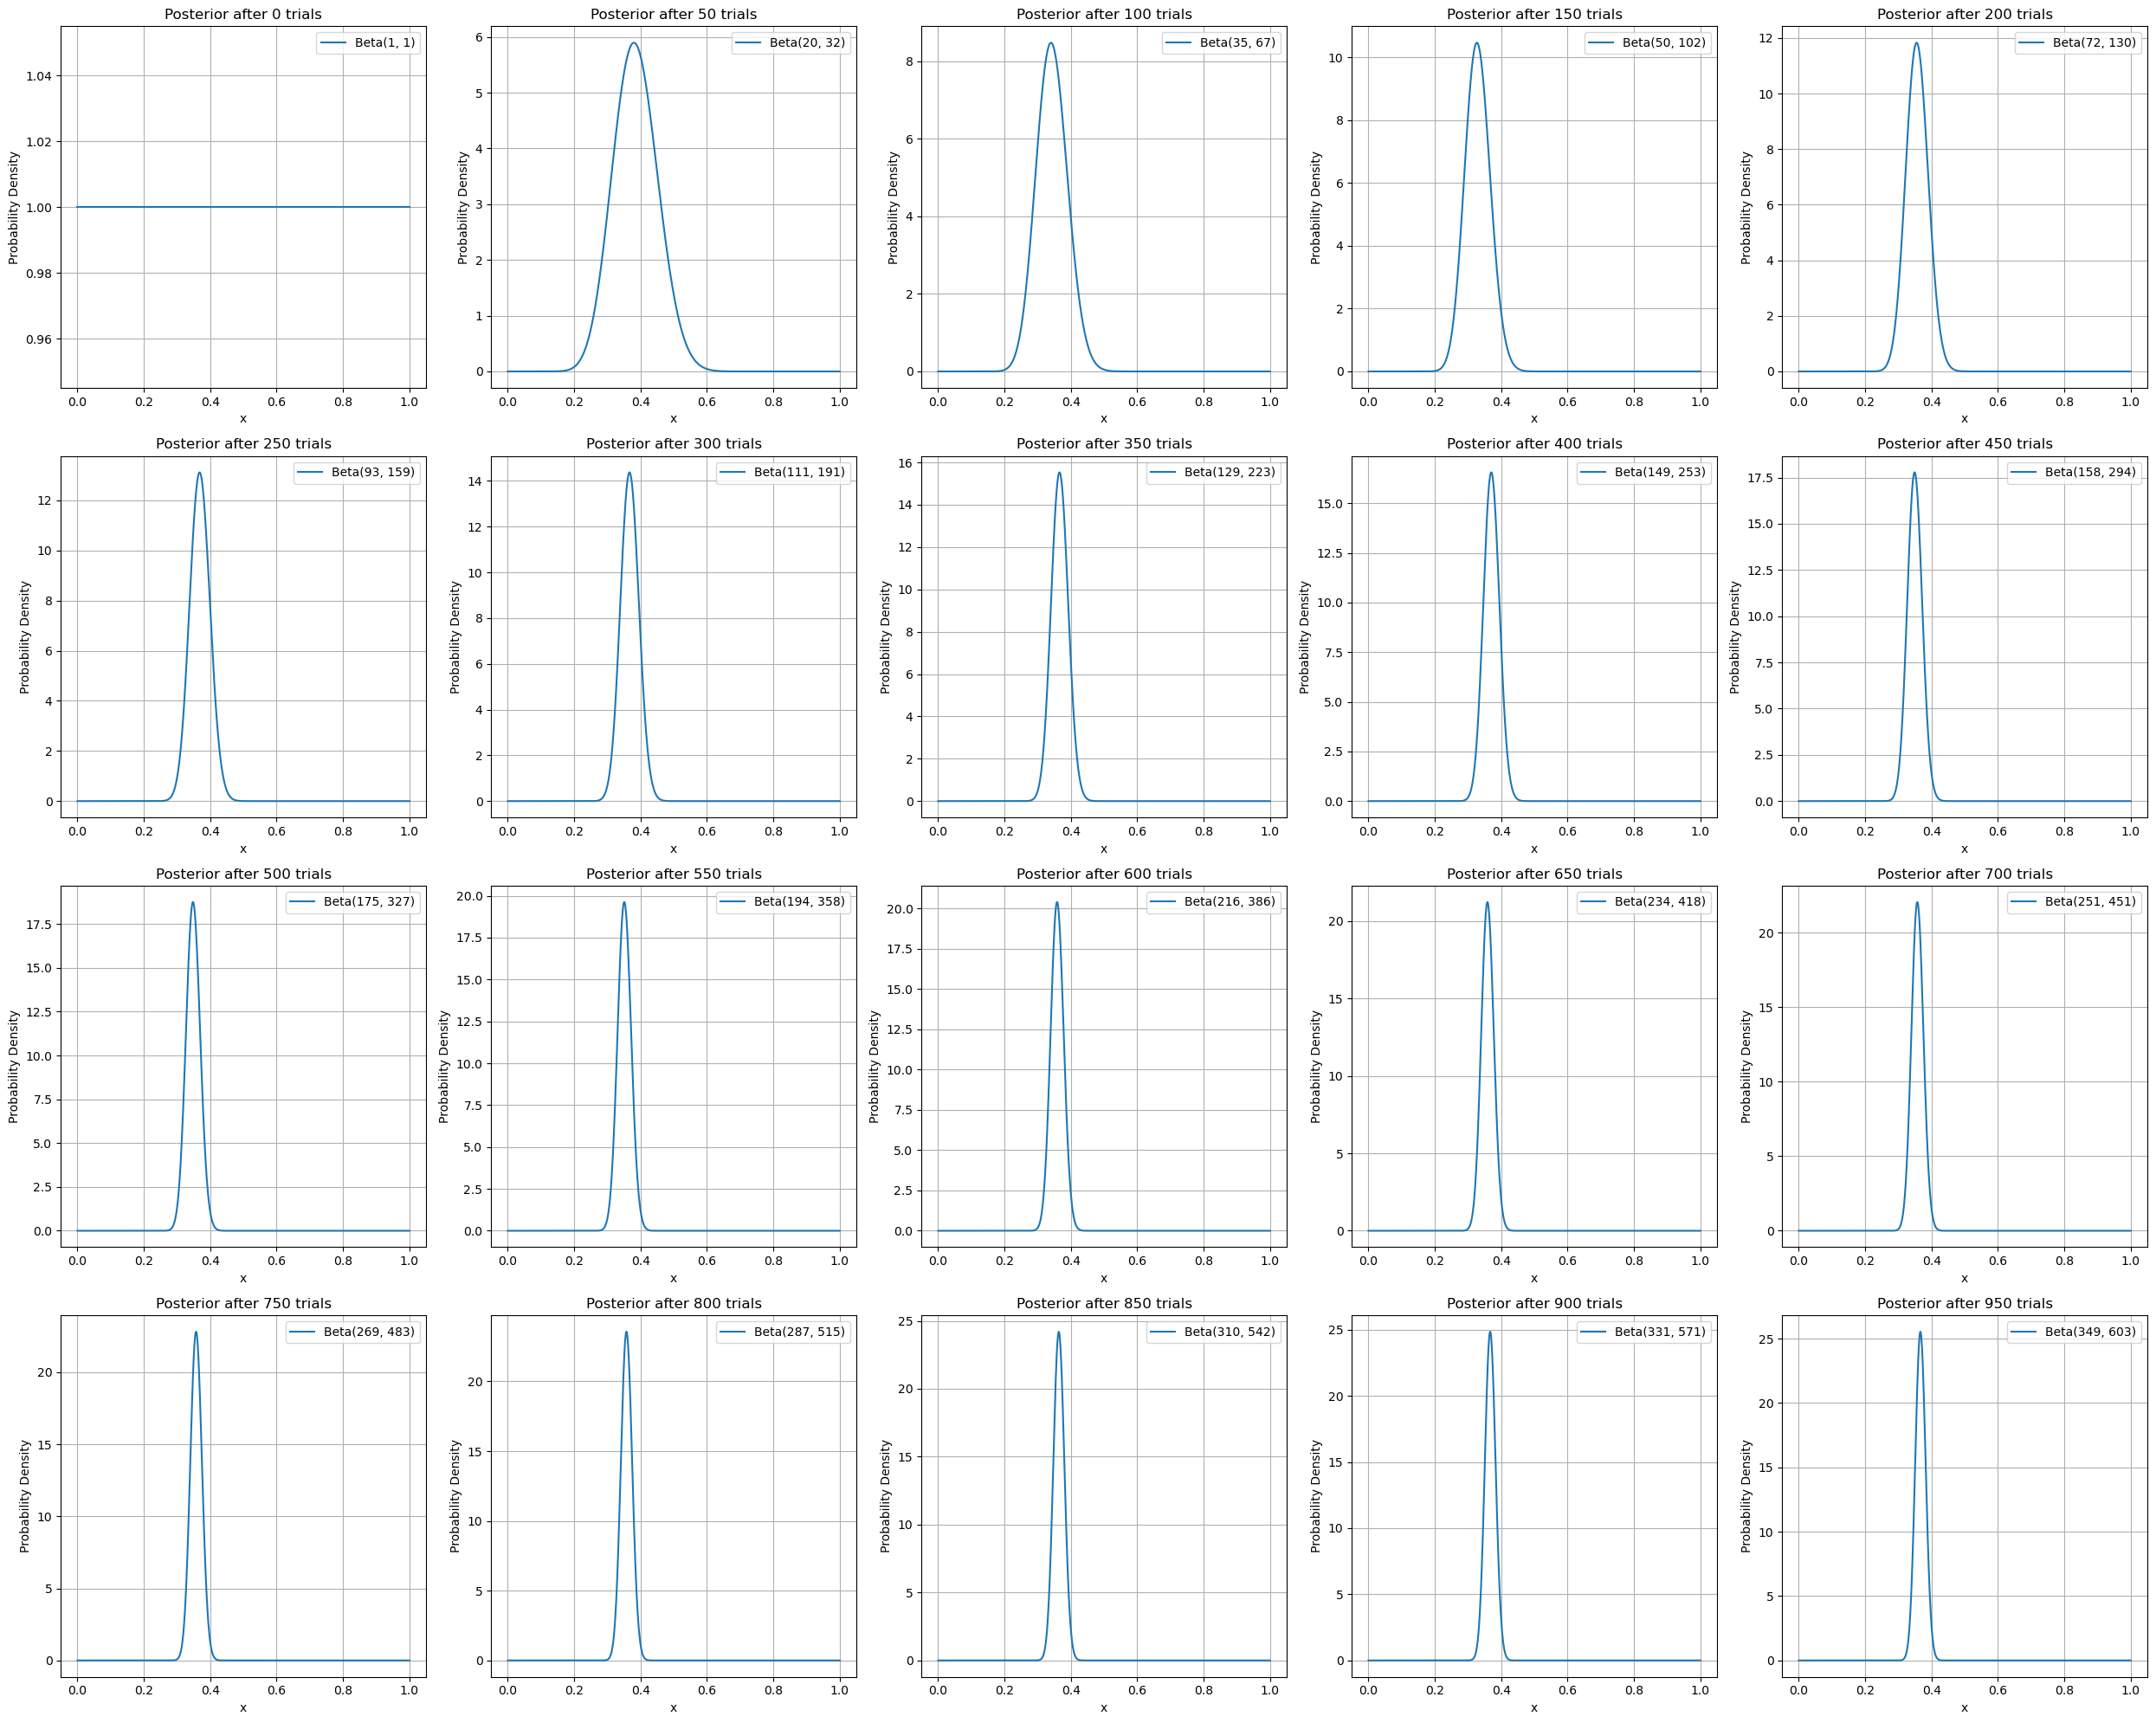

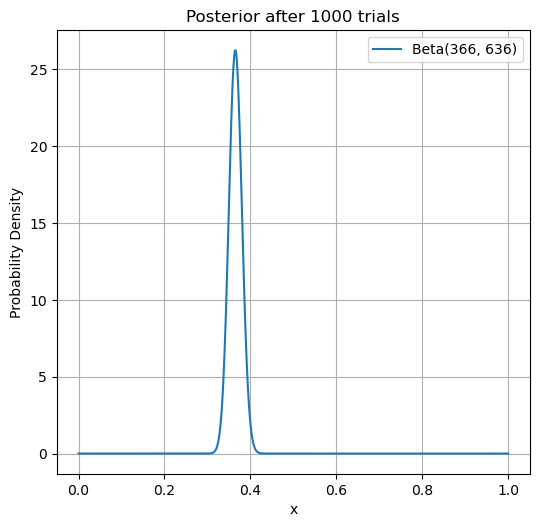

In [6]:
flips = read_coin_flips('../data/coin_flips.txt')
uniform_prior = BetaDistribution(1, 1)
plot_posteriors_after_trials(uniform_prior, flips)

Now calculate the final posterior mean and variance.

$\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}$

$\text{var}[X] = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$

In [7]:
uniform_heads = sum(flips)
uniform_tails = len(flips) - uniform_heads
final_u = BetaDistribution(uniform_prior.alpha + uniform_heads, uniform_prior.beta + uniform_tails)

uniform_mean = final_u.alpha / (final_u.alpha + final_u.beta)
uniform_variance = (final_u.alpha * final_u.beta) / ((final_u.alpha + final_u.beta)**2 * (final_u.alpha + final_u.beta + 1))
print(f"Uniform Prior Final Posterior Mean: {uniform_mean}, Variance: {uniform_variance}")

Uniform Prior Final Posterior Mean: 0.3652694610778443, Variance: 0.00023115421922407326


## Prior: $Beta(4, 10)$

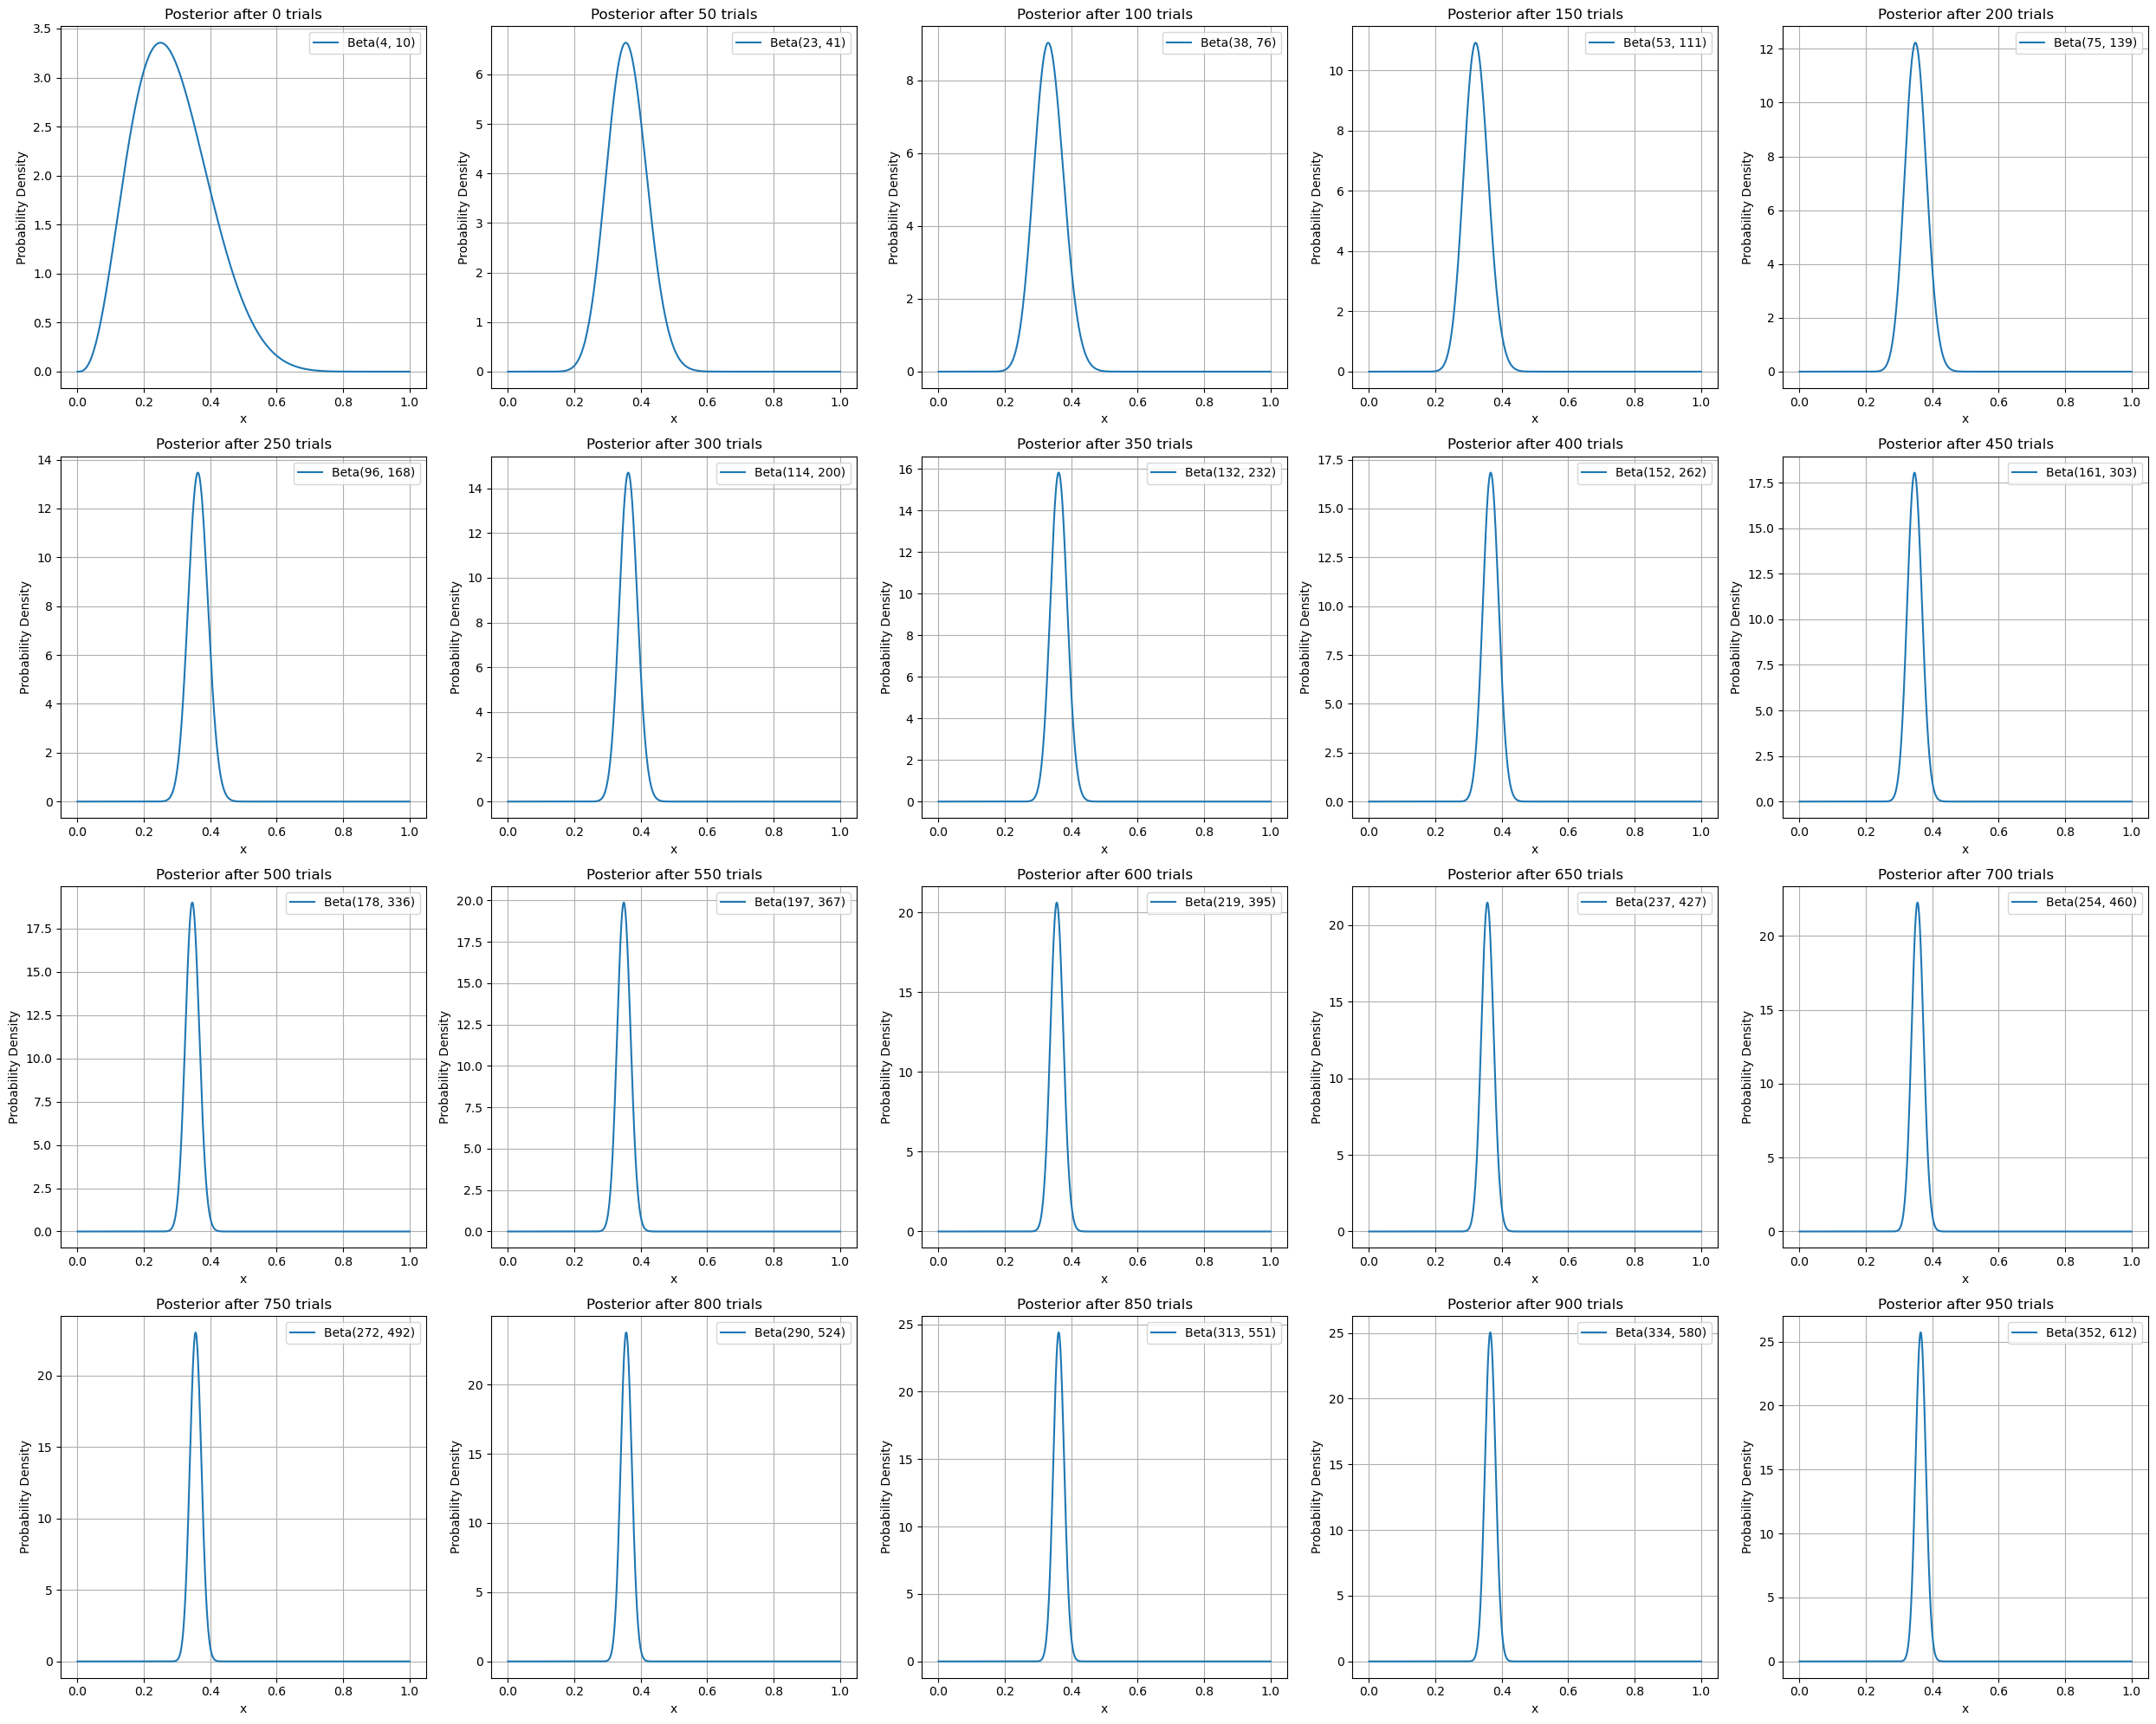

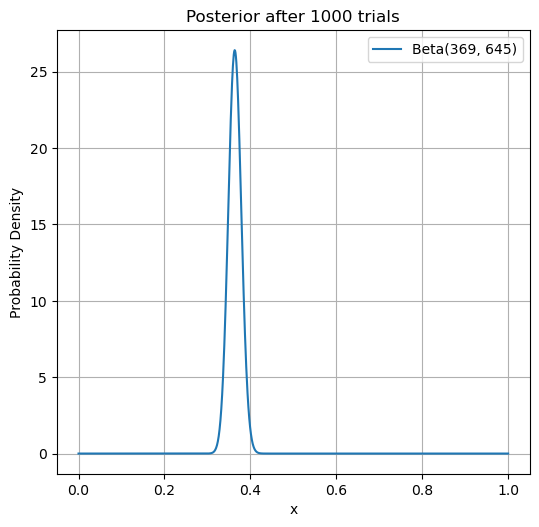

In [8]:
flips = read_coin_flips('../data/coin_flips.txt')
beta_prior = BetaDistribution(4, 10)
plot_posteriors_after_trials(beta_prior, flips)

Now calculate the final posterior mean and variance.

$\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}$

$\text{var}[X] = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$

In [9]:
beta_heads = sum(flips)
beta_tails = len(flips) - beta_heads
final_b = BetaDistribution(beta_prior.alpha + beta_heads, beta_prior.beta + beta_tails)

beta_mean = final_b.alpha / (final_b.alpha + final_b.beta)
beta_variance = (final_b.alpha * final_b.beta) / ((final_b.alpha + final_b.beta)**2 * (final_b.alpha + final_b.beta + 1))
print(f"Beta Prior Final Posterior Mean: {beta_mean}, Variance: {beta_variance}")

Beta Prior Final Posterior Mean: 0.363905325443787, Variance: 0.0002280573788743236


Given the closeness of the results, we can conclude that when the number of experiments is large, if the prior probability distributions are different, the posterior probability distributions will be closer and closer to each other.